# Actividad - Regresión Lineal

* **Nombre:**
* **Matrícula:**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv('datasets/presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

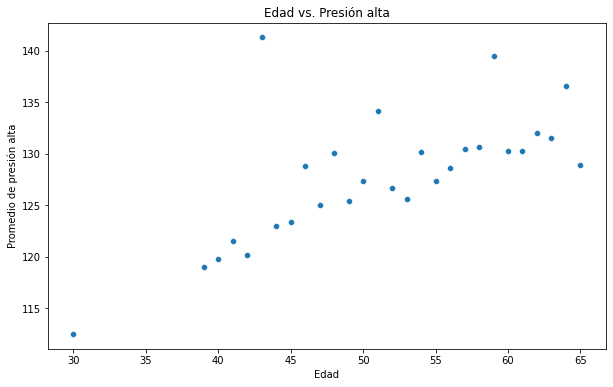

In [3]:
# Grafica la información de la edad y presión alta

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Average of ap_hi')

plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta')
plt.title('Edad vs. Presión alta')
plt.show()

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [4]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

model_ap_hi = LinearRegression(fit_intercept=True)
model_ap_hi.fit(df[['Age']], df['Average of ap_hi'])

print('El valor de a es: ', model_ap_hi.coef_[0])
print('El valor de b es: ', model_ap_hi.intercept_)

El valor de a es:  0.47769702977669154
El valor de b es:  103.3969740964366


In [5]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?

model_ap_lo = LinearRegression(fit_intercept=True)
model_ap_lo.fit(df[['Age']], df['Average of ap_lo'])

print('El valor de a es: ', model_ap_lo.coef_[0])
print('El valor de b es: ', model_ap_lo.intercept_)

El valor de a es:  0.6089810580238237
El valor de b es:  63.726200409422745


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

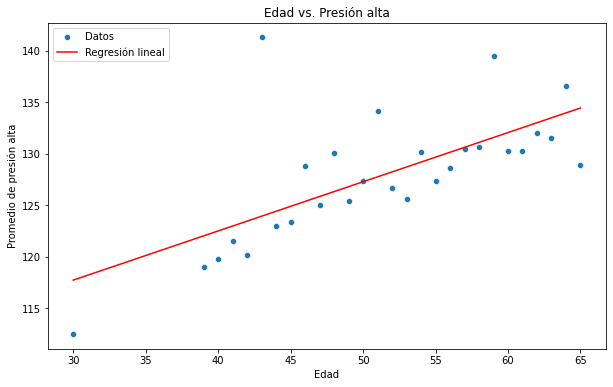

In [6]:
# Presión alta

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Average of ap_hi', label='Datos')
sns.lineplot(x=df['Age'], y=model_ap_hi.predict(df[['Age']]), color='red', label='Regresión lineal')

plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta')
plt.title('Edad vs. Presión alta')
plt.show()

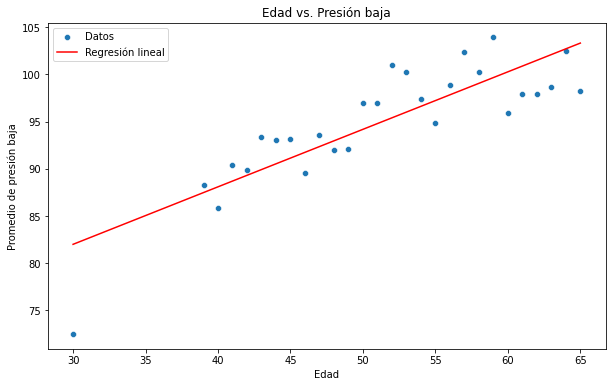

In [7]:
# Presión baja

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Average of ap_lo', label='Datos')
sns.lineplot(x=df['Age'], y=model_ap_lo.predict(df[['Age']]), color='red', label='Regresión lineal')

plt.xlabel('Edad')
plt.ylabel('Promedio de presión baja')
plt.title('Edad vs. Presión baja')
plt.show()

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [8]:
def pressure_low(age):
  presion = model_ap_lo.predict([[age]])[0]
  return f"La presión baja para una persona de {age} años es de {presion}"

query_age= 76
pressure_low(query_age)

C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'La presión baja para una persona de 76 años es de 110.00876081923334'

In [9]:
def pressure_high(age):
  presion = model_ap_hi.predict([[age]])[0]
  return f"La presión alta para una persona de {age} años es de {presion}"

query_age= 76
pressure_high(query_age)

C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'La presión alta para una persona de 76 años es de 139.70194835946515'